# Iris Classification with Decision Trees and Ensemble Methods

This notebook explores the classification of the famous **Iris dataset** using multiple tree-based and ensemble models, with hyperparameter optimization via **GridSearchCV**.

The models included are:
- Decision Tree
- Random Forest
- Gradient Boosting
- AdaBoost
- Bagging

We will compare their performances using **accuracy** and visualize the decision trees.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import os 
save_path = "../images"
os.makedirs(save_path, exist_ok=True)

## Load and Prepare the Dataset

In [15]:
data = pd.read_csv("../data/iris.csv")
data_shuffled = data.sample(frac=1, random_state=42)

X = data.drop('variety', axis=1)
Y = data['variety']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y, shuffle=True
)

## Basic Decision Tree

In [16]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", acc_tree)
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Optimized Decision Tree with GridSearchCV

In [17]:
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred_tree_opt = best_tree.predict(X_test)
acc_tree_opt = accuracy_score(y_test, y_pred_tree_opt)

print("Best Parameters:", grid_tree.best_params_)
print("Optimized Decision Tree Accuracy:", acc_tree_opt)
print(classification_report(y_test, y_pred_tree_opt))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Optimized Decision Tree Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [18]:
depths = range(1, 7)
accuracies = []

for d in depths:
    model_test = DecisionTreeClassifier(max_depth=d, splitter='random', random_state=42)
    model_test.fit(X_train, y_train)
    y_pred_test = model_test.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    accuracies.append(acc)
    print(f"max_depth={d}, Accuracy={acc:.3f}")

max_depth=1, Accuracy=0.667
max_depth=2, Accuracy=0.933
max_depth=3, Accuracy=0.933
max_depth=4, Accuracy=0.933
max_depth=5, Accuracy=0.933
max_depth=6, Accuracy=0.933


## Decision Tree Visualization

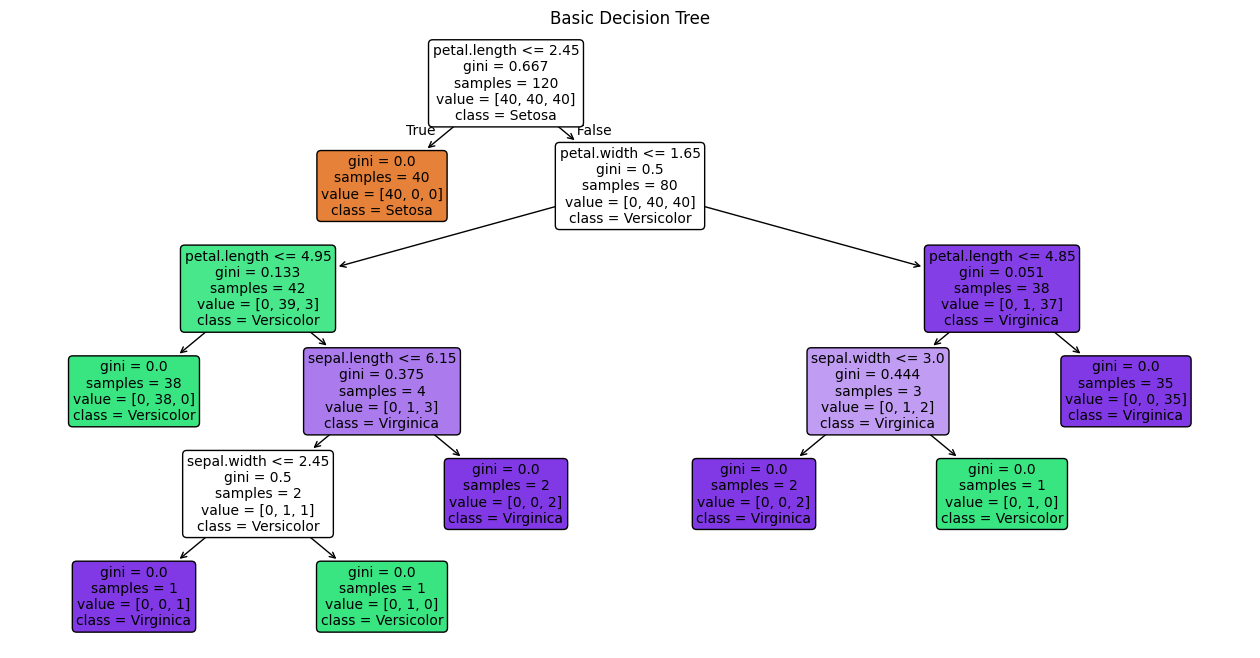

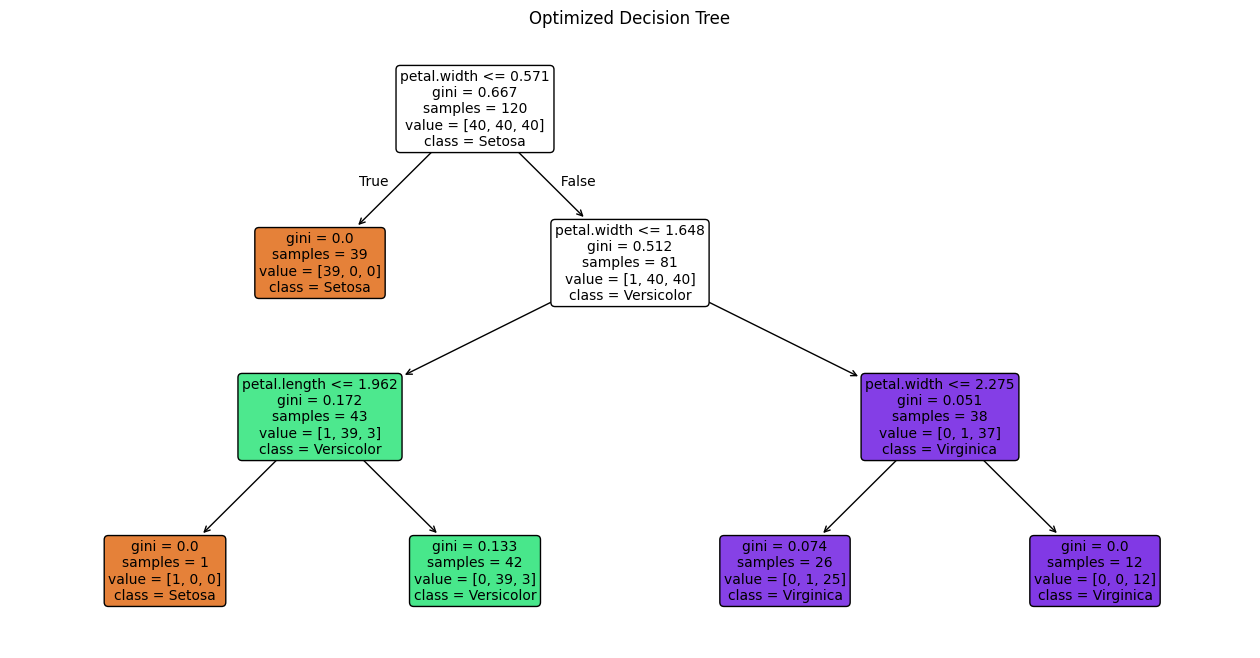

In [19]:
plt.figure(figsize=(16, 8))
tree.plot_tree(
    model_tree,
    feature_names=X.columns,
    class_names=Y.unique(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Basic Decision Tree")
plt.savefig(f"{save_path}/Basic_Decision_tree.png", dpi=300)
plt.show()

plt.figure(figsize=(16, 8))
tree.plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=Y.unique(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Optimized Decision Tree")
plt.savefig(f"{save_path}/optimized_Decision_tree.png", dpi=300)
plt.show()

## Ensemble Methods
We use **Random Forest, Gradient Boosting, AdaBoost, and Bagging**. Each model is optimized using GridSearchCV.

## Random Forest

In [20]:
param_rf = {'n_estimators': [10,50,100],'max_depth':[2,3,4,5,None],'criterion':['gini','entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Gradient Boosting

In [21]:
param_gb = {'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,0.5],'max_depth':[2,3,4]}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## AdaBoost

In [22]:
param_ad = {'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0],
            'estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)]}
grid_ad = GridSearchCV(AdaBoostClassifier(random_state=42), param_ad, cv=5, scoring='accuracy', n_jobs=-1)
grid_ad.fit(X_train, y_train)
best_ad = grid_ad.best_estimator_
y_pred_ad = best_ad.predict(X_test)
acc_ad = accuracy_score(y_test, y_pred_ad)
print("AdaBoost Accuracy:", acc_ad)
print(classification_report(y_test, y_pred_ad))

AdaBoost Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Bagging

In [23]:
param_bag = {'n_estimators':[10,30,50,100],
             'estimator':[DecisionTreeClassifier(max_depth=2),
                          DecisionTreeClassifier(max_depth=3),
                          DecisionTreeClassifier(max_depth=None)]}
grid_bag = GridSearchCV(BaggingClassifier(random_state=42), param_bag, cv=5, scoring='accuracy', n_jobs=-1)
grid_bag.fit(X_train, y_train)
best_bag = grid_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Accuracy:", acc_bag)
print(classification_report(y_test, y_pred_bag))

Bagging Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Comparison of All Models
We summarize and visualize the accuracy of all models.

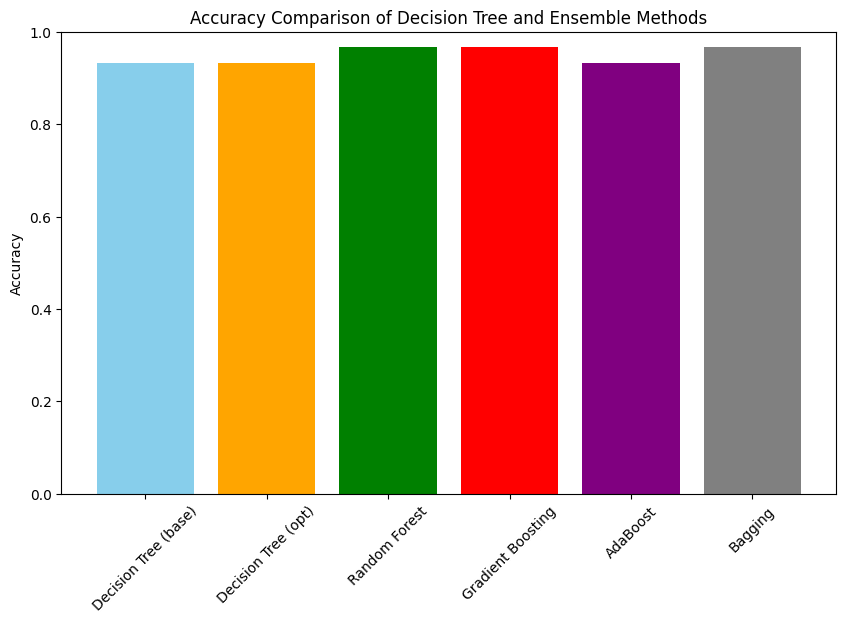

Decision Tree (base): 0.933
Decision Tree (opt): 0.933
Random Forest: 0.967
Gradient Boosting: 0.967
AdaBoost: 0.933
Bagging: 0.967


In [24]:
results = {'Decision Tree (base)': acc_tree,
           'Decision Tree (opt)': acc_tree_opt,
           'Random Forest': acc_rf,
           'Gradient Boosting': acc_gb,
           'AdaBoost': acc_ad,
           'Bagging': acc_bag}

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color=['skyblue','orange','green','red','purple','gray'])
plt.xticks(rotation=45)
plt.title("Accuracy Comparison of Decision Tree and Ensemble Methods")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.savefig(f"{save_path}/Comparison.png", dpi=300)
plt.show()

for model, acc in results.items():
    print(f"{model}: {acc:.3f}")

## Conclusion

In this notebook, we explored the classification of the Iris dataset using a variety of **tree-based and ensemble methods**. 

Key takeaways:

- **Decision Tree**: Simple and interpretable, but performance improves significantly with hyperparameter tuning.
- **Random Forest**: Handles overfitting well and achieves high accuracy.
- **Gradient Boosting & AdaBoost**: Powerful ensemble methods that improve accuracy by focusing on difficult samples.
- **Bagging**: Reduces variance and stabilizes predictions compared to a single decision tree.

Overall, ensemble methods consistently outperform a single decision tree. Visualization helps in understanding model decisions and feature importance.

Next steps could include testing with other datasets, feature scaling, or using more advanced ensemble methods like XGBoost or LightGBM.